In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size = (200,2))
y = np.array(X[:, 0] ** 2 + X[:, 1] < 1.5, dtype = 'int')

for _ in range(20):
    y[np.random.randint(200)] = 1 #随机将200个样本中的20个改成label是1

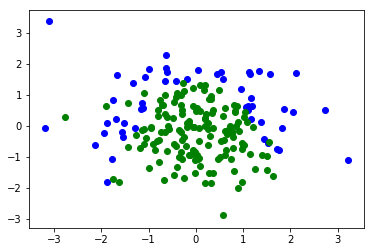

In [6]:
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

### Using logistic regression in sklearn

In [8]:
from sklearn.linear_model import LogisticRegression #LogisticRegression也算作是线性模型

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/bessie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
log_reg.score(X_train, y_train) 
#分数不是很高，因为我们的上帝视角是有二次项：x^2, 但是Log_reg是线性模型

0.7933333333333333

In [11]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


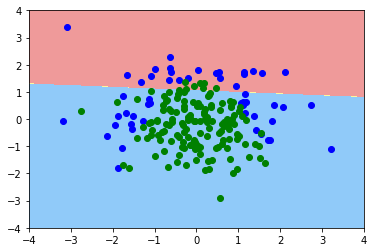

In [12]:
plot_decision_boundary(log_reg, axis = [-4,4,-4,4])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

### 用多项式项进行逻辑回归

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline(
    [
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [14]:
poly_log_reg = PolynomialLogisticRegression(degree = 2)
poly_log_reg.fit(X_train, y_train)

/Users/bessie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [15]:
poly_log_reg.score(X_train, y_train)

0.9133333333333333

In [16]:
poly_log_reg.score(X_test, y_test) #泛化能力

0.94

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


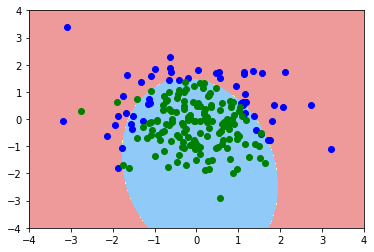

In [17]:
plot_decision_boundary(poly_log_reg, axis = [-4,4,-4,4])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

### 增加degree至20

In [18]:
poly_log_reg2 = PolynomialLogisticRegression(degree = 20) #可能会过拟合
poly_log_reg2.fit(X_train, y_train)

/Users/bessie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [19]:
poly_log_reg2.score(X_train, y_train)

0.94

In [21]:
poly_log_reg2.score(X_test, y_test) #泛化能力：比poly_log_reg差一些，说明有一定过拟合

0.92

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


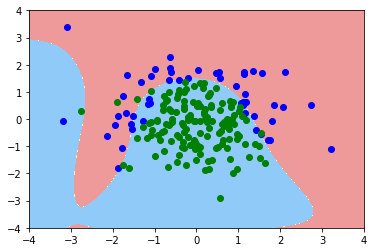

In [22]:
plot_decision_boundary(poly_log_reg2, axis = [-4,4,-4,4])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

#### 上图边界弯曲，可能存在过拟合

### 在LdogisticRegression中加入模型的正则化的超参数C, 现在正则项是L2正则项：

In [23]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline(
    [
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C = C))
    ])

In [24]:
poly_log_reg3 = PolynomialLogisticRegression(degree = 20, C = 0.1) 
#让正则化的项起更大作用，所以我们会让正则化项L更小

In [25]:
poly_log_reg3.fit(X_train, y_train)

/Users/bessie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [26]:
poly_log_reg3.score(X_train, y_train)

0.8533333333333334

In [27]:
poly_log_reg3.score(X_test, y_test)

0.92

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


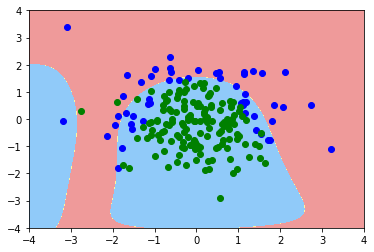

In [28]:
plot_decision_boundary(poly_log_reg3, axis = [-4,4,-4,4])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

### 在LdogisticRegression中加入模型的正则化的超参数C, 现在正则项是L1正则项：

In [29]:
def PolynomialLogisticRegression(degree, C, penalty = 'l2'): #penalty是字符串: 是L2不是12
    return Pipeline(
    [
        ('poly', PolynomialFeatures(degree = degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C = C, penalty = penalty))
    ])

In [30]:
poly_log_reg4 = PolynomialLogisticRegression(degree = 20, C = 0.1, penalty='l1') 
poly_log_reg4.fit(X_train, y_train)

/Users/bessie/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [31]:
print(poly_log_reg4.score(X_train, y_train))
print(poly_log_reg4.score(X_test, y_test))

0.8266666666666667
0.9


/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


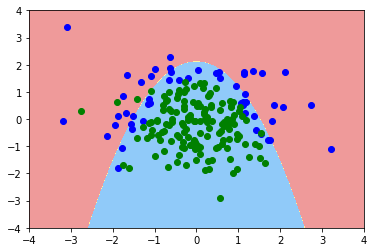

In [32]:
plot_decision_boundary(poly_log_reg4, axis = [-4,4,-4,4])
plt.scatter(X[y == 0, 0],X[y == 0, 1],color = 'b')
plt.scatter(X[y == 1, 0],X[y == 1, 1],color = 'g')
plt.show()

### L1正则项：有feature selection的好处，所以不像L2正则有两块地方是蓝色区域这样弯曲